# SGD Regressor

In [2]:
#Importing the necessary packages

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

%matplotlib inline

In [10]:
class SGD_Regression():
    
    def __init__(self, intLR = 0.0001, intNumberOfIterations = 1000):
        self.X = None
        self.y = None
        self.w = None
        self.intLR = intLR
        self.intNumberOfIterations = intNumberOfIterations
        self.CostFunctionValue = None
    
    def fcnAddBias(self, x):
        return np.hstack((np.ones(len(x))[:,np.newaxis],x))
    
    def fcnCostFunctionMSE(self, x, y, w):
        m = len(x)
        loss = (1 / (2 * m)) * np.sum((y - np.dot(x, w)) ** 2)

        return loss

    #Calculating the Weight using Gradient Descent
    def fcnCalculateRegressionParametersUsingGradientDescent(self, x, y, intLR, intNumberOfIterations):
        if len(x.shape) == 1:
            x = x[:,np.newaxis]
        if len(y.shape) == 1:
            y = y[:,np.newaxis]
        x = self.fcnAddBias(x)
        w = np.zeros(x.shape[1]).reshape(-1,1)
        m = len(x)
        CostFunctionValue = np.zeros(intNumberOfIterations)
        for i in range(0, intNumberOfIterations):
            dj = (1/m) * (np.dot(x.T, -1 * (y - np.dot(x, w))))
            w = w - intLR * dj    
            CostFunctionValue[i] = self.fcnCostFunctionMSE(x, y, w)
            
        return w, CostFunctionValue
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.w, self.CostFunctionValue = self.fcnCalculateRegressionParametersUsingGradientDescent(X, y, self.intLR, self.intNumberOfIterations)
        
        return self
    
    def predict(self, X):
        x = self.fcnAddBias(X)

        return np.dot(x, self.w)

In [18]:
#Prediction and Error Metrics calculation

def fcnCalculateSSE(yActual, yPredicted):
    return np.sum((yActual - yPredicted) ** 2)

def fcnCalculateSST(yActual, yPredicted):
    return np.sum((yPredicted - np.mean(yActual)) ** 2)

def fcnCalculateR(yActual, yPredicted):
    return 1 - (fcnCalculateSSE(yActual, yPredicted)/fcnCalculateSST(yActual, yPredicted))

def fcnCalculateMSE(YActual, YPredicted):
    sum_error = 0.0
    for i in range(len(YActual)):
        prediction_error = YActual[i] - YPredicted[i]
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(YActual))

    return mean_error

In [5]:
data = pd.read_csv("mpg_data.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,category,carname
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,low,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,Medium,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,low,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,low,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,low,ford galaxie 500


In [6]:
#Extracting the numerical features from pd to np

col = data.columns
we = data.to_numpy()
we = we[:,0:8]
we = we.astype(np.float64)
we

array([[ 15. ,   8. , 350. , ...,  11.5,  70. ,   1. ],
       [ 18. ,   8. , 318. , ...,  11. ,  70. ,   1. ],
       [ 16. ,   8. , 304. , ...,  12. ,  70. ,   1. ],
       ...,
       [ 28. ,   4. , 120. , ...,  18.6,  82. ,   1. ],
       [ 31. ,   4. , 119. , ...,  19.4,  82. ,   1. ],
       [ 18. ,   8. , 307. , ...,  12. ,  70. ,   1. ]])

In [7]:
#Splitting the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = we[:,1:]
y = we[:,0]
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
sgd_reg = SGD_Regression(0.005, 2000)
sgd_reg.fit(x_train, y_train)
sgd_reg.w

array([[23.47564114],
       [-0.18026402],
       [-0.36645458],
       [-1.26633989],
       [-3.65093477],
       [-0.27873519],
       [ 2.52981426],
       [ 0.98993276]])

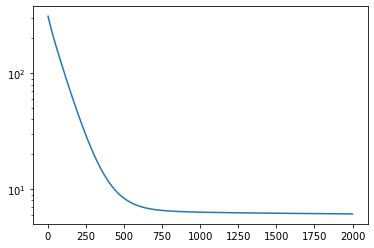

In [14]:
plt.figure()
plt.semilogy(sgd_reg.CostFunctionValue)

In [16]:
linear_model = SGDRegressor()
linear_model.fit(x_train, y_train)

print("The weight vector : {} and intercept is : {}".format(linear_model.coef_, linear_model.intercept_))

The weight vector : [ 0.01710119  0.31698566 -1.06085072 -4.6111439  -0.06623411  2.58189491
  0.99816695] and intercept is : [23.47561149]


In [17]:
#Executing the model and calculating the error

yPredicted = sgd_reg.predict(x_train)
yPredicted_test = sgd_reg.predict(x_test)
SSE = fcnCalculateSSE(y_test[:,np.newaxis], yPredicted_test)
SST = fcnCalculateSST(y_test[:,np.newaxis], yPredicted_test)
R2 = fcnCalculateR(y_test[:,np.newaxis], yPredicted_test)

In [19]:
print("Train Error: {}".format(fcnCalculateMSE(y_train, yPredicted)))
print("Test Error: {}".format(fcnCalculateMSE(y_test, yPredicted_test)))
print("SSE: {}, SST: {}, R2: {}".format(SSE, SST, R2))

Train Error: [12.24432257]
Test Error: [7.64019542]
SSE: 603.5754384626916, SST: 3789.7994556285503, R2: 0.840736839632432


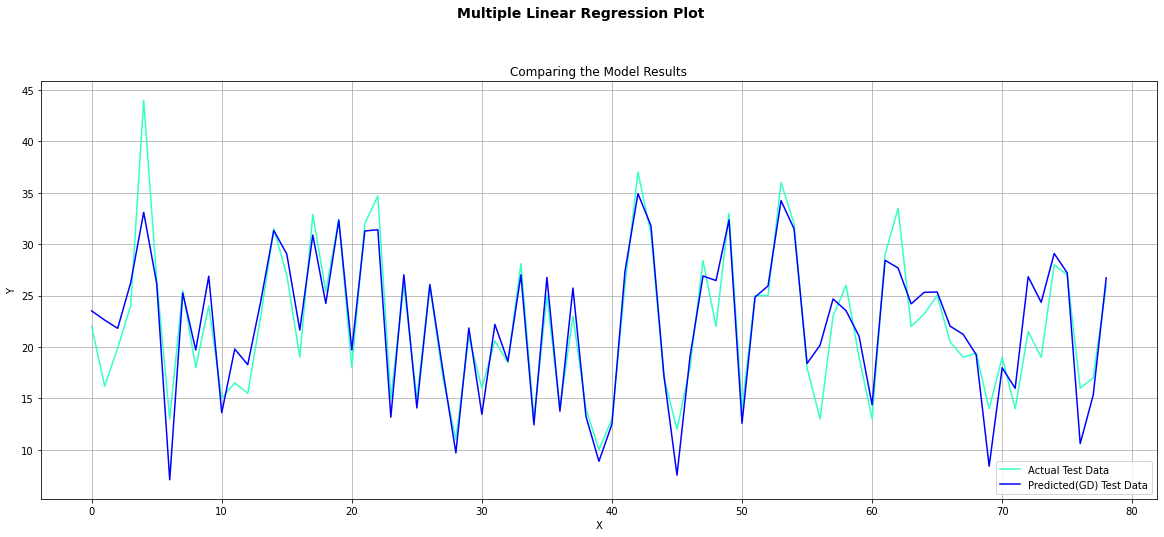

In [21]:
#Plotting all the datapoints

fig = plt.figure(figsize=(20,8))
fig.suptitle("Multiple Linear Regression Plot", fontsize=14, fontweight="bold")
ax = fig.add_subplot(111)
fig.subplots_adjust(top = 0.85)
ax.set_title("Comparing the Model Results")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.grid(True)
plt.plot(y_test , color='#33FFC7',label = 'Actual Test Data')
plt.plot(yPredicted_test, color='b', label = "Predicted(GD) Test Data")
plt.legend(loc=4)
plt.show()